# Implementing Quantum Teleportation

In [10]:
# Imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.extensions import Initialize
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector

sim = AerSimulator()  # Initialize a simulator instance

# Set up circuits for Alice and Bob
# We use three qubits, but imagine that each person can access only the qubits they have on hand at any time
# And we have three measurement slots for Alice's two measurements according to the protocol as well as Bob's final measurement of the unknown qubit
qrAlice = QuantumRegister(2, name="alice")
qrBob = QuantumRegister(1, name="bob")
cl = ClassicalRegister(1, name="meas1")
cl2 = ClassicalRegister(1, name="meas2")
cl3 = ClassicalRegister(1, name="out")
alice = QuantumCircuit(qrAlice, qrBob, cl, cl2, cl3)
bob = QuantumCircuit(qrAlice, qrBob, cl, cl2, cl3)

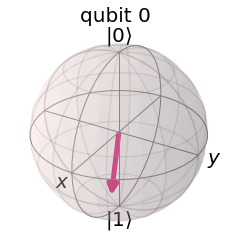

In [11]:
# Alice has the qubit in an unknown state, qubit 0 in our circuit
unknownState = random_statevector(2)
unknownInit = Initialize(unknownState) # Initialize a superposition with certain unknown coefficients
alice.append(unknownInit, [0])
alice.barrier()
plot_bloch_multivector(unknownState);


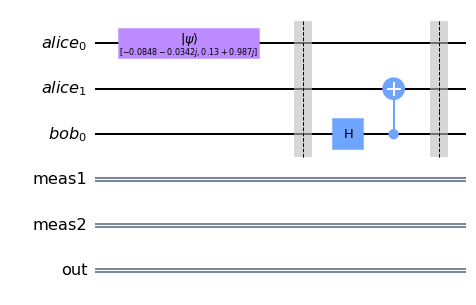

In [12]:
# Alice and Bob get together to entangle a pair of qubits, then Alice takes qubit 1 and Bob takes 2.
alice.h(2)
alice.cx(2, 1)  # Recall that this creates the Bell state between qubits 1 and 2
alice.barrier()
# Imagine that after this, Alice has access only to qubit 1 and Bob only to qubit 2.
# They want to transport the unknown state of qubit 0 from Alice to Bob.

alice.draw(output="mpl");

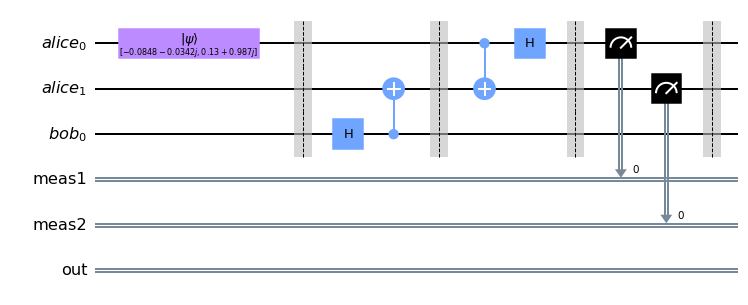

In [13]:
alice.cx(0, 1)  # Alice runs the unknown qubit and her entangled qubit through a CNOT
# Now the target has taken on coefficients that relate to the unknown qubit, due to entanglement
# Alice also puts the unknown qubit through an H gate — the final preparation step
alice.h(0)
alice.barrier()
alice.measure([0], [0])  # After passing the unknown qubit through an H gate, Alice measures that qubit
alice.measure([1], [1])  # She also measures the target qubit
alice.barrier()
alice.draw(output="mpl");

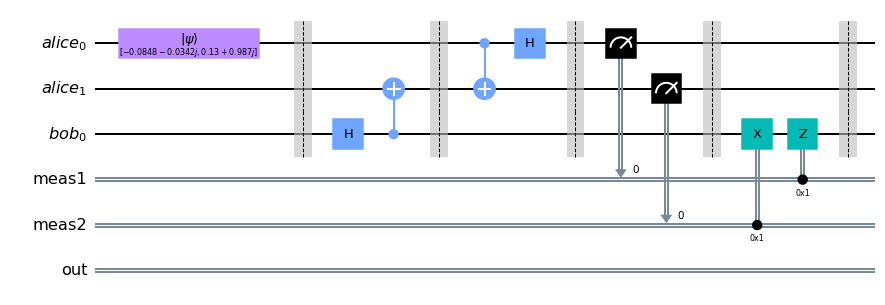

In [14]:
# Now Bob's entangled qubit (qubit 2) has the correct coefficients in some permutation
# He has to use measurements 1 and 2 to decide what to do
bob.x(2).c_if(cl2, 1)
bob.z(2).c_if(cl, 1)

combined = alice.compose(bob)
combined.save_statevector()

combined.draw(output="mpl");

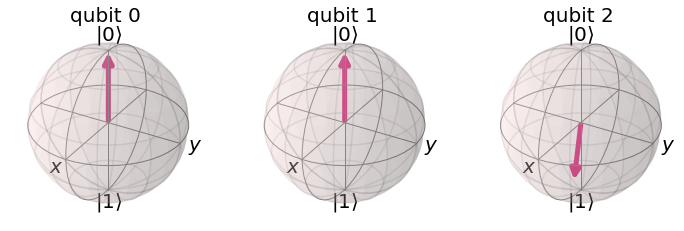

In [15]:
# Let's see the state of the system after this circuit runs

plot_bloch_multivector(sim.run(combined).result().get_statevector());

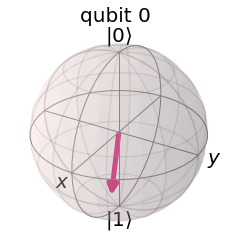

In [16]:
# For comparison, here's the unknown state from the beginning...
# Neither Alice nor Bob ever knew the coefficients, but the state was teleported
# from qubit 0 in Alice's "possession" to qubit 2 in Bob's "possession"

plot_bloch_multivector(unknownState);